In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.utils import pad_sequences

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32


In [ ]:
print("Loading data....")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features) 
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print("pad sequences (samples x time)")
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen = maxlen)
print("input_train shape: ", input_train.shape)
print("input_test shape: ", input_test.shape)

Loading data....
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 21s 124ms/step - loss: 0.6415 - accuracy: 0.6165 - val_loss: 0.5287 - val_accuracy: 0.7542
Epoch 2/10
157/157 [==============================] - 19s 123ms/step - loss: 0.3950 - accuracy: 0.8306 - val_loss: 0.4307 - val_accuracy: 0.8074
Epoch 3/10
157/157 [==============================] - 21s 132ms/step - loss: 0.2963 - accuracy: 0.8848 - val_loss: 0.3528 - val_accuracy: 0.8558
Epoch 4/10
157/157 [==============================] - 19s 124ms/step - loss: 0.2291 - accuracy: 0.9121 - val_loss: 0.4538 - val_accuracy: 0.8208
Epoch 5/10
157/157 [==============================] - 20s 126ms/step - loss: 0.1894 - accuracy: 0.9309 - val_loss: 0.4013 - val_accuracy: 0.8470
Epoch 6/10
157/157 [==============================] - 20s 125ms/step - loss: 0.1300 - accuracy: 0.9534 - val_loss: 0.6730 - val_accuracy: 0.7864
Epoch 7/10
157/157 [==============================] - 21s 132ms/step - loss: 0.1126 - accuracy: 0.9580 - val_loss: 0.4847 - val_ac

In [ ]:
predicted_classes = model.predict(input_test)
import numpy as np
predicted_classes = np.argmax(np.round(predicted_classes), axis = 1)
print(predicted_classes.shape, y_test.shape)

782/782 [==============================] - 15s 19ms/step
(25000,) (25000,)


In [ ]:
correct = np.where(predicted_classes == y_test)[0]
print("Found %d correct labels" % len(correct))
incorrect = np.where(predicted_classes != y_test)[0]
print("Found %d incorrect labels" % len(incorrect))


Found 12500 correct labels
Found 12500 incorrect labels


In [ ]:
from sklearn.metrics import classification_report
num_classes = 2
target_name = ["Class{}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names = target_name))

              precision    recall  f1-score   support

      Class0       0.50      1.00      0.67     12500
      Class1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


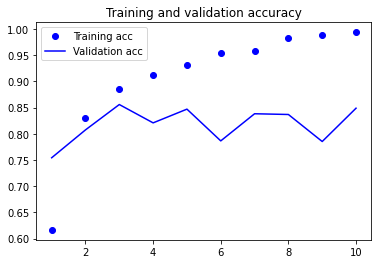

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

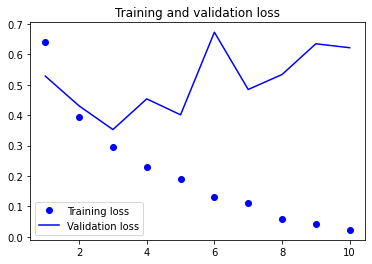

In [ ]:
plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1 ,len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()
